# Project Data Wrangling Samuel Acker

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data and merge together

In [143]:
# load data 
lego_data = pd.read_csv("/Users/sammy/Downloads/Brickset-list.csv")

price_data = pd.read_excel("/Users/sammy/Downloads/LEGO (1)/DiB whole sample Jan 2018 - Apr 2019 prices.xlsx", header=1)

#use inner merge on id
BigBrick = pd.merge(lego_data, price_data, on=['id'], how='inner')


print(BigBrick.columns)

display(BigBrick)

Index([               'id',             'Theme',           'SetName',
           'USRetailPrice',            'Pieces',          'Minifigs',
              'Unnamed: 6',        'Unnamed: 7',             'theme',
                    'name',   'year of release',       '# of pieces',
        '# of minifigures', 2018-01-01 00:00:00, 2018-02-01 00:00:00,
       2018-03-01 00:00:00, 2018-04-01 00:00:00, 2018-05-01 00:00:00,
       2018-06-01 00:00:00, 2018-07-01 00:00:00, 2018-08-01 00:00:00,
       2018-09-01 00:00:00, 2018-10-01 00:00:00, 2018-11-01 00:00:00,
       2018-12-01 00:00:00, 2019-01-01 00:00:00, 2019-02-01 00:00:00,
       2019-03-01 00:00:00, 2019-04-01 00:00:00],
      dtype='object')


,id,Theme,SetName,USRetailPrice,Pieces,Minifigs,Unnamed: 6,Unnamed: 7,theme,name,...,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
0,10179,Star Wars,Ultimate Collector's Millennium Falcon,499.99,5197.0,5.0,NaN,NaN,Star Wars,Ultimate Collector’s Millennium Falcon,...,2129.67,2189.73,2259.80,2259.80,2353.13,2133.87,1921.27,1804.53,1713.87,1768.07
1,10221,Star Wars,Super Star Destroyer,399.99,3152.0,5.0,NaN,NaN,Star Wars,Super Star Destroyer,...,696.90,741.79,785.05,715.88,720.35,730.83,741.00,770.67,776.87,733.33
2,10188,Star Wars,Death Star,399.99,3803.0,24.0,NaN,NaN,Star Wars,Death Star,...,385.87,388.19,385.33,385.33,366.32,395.36,362.33,371.87,349.00,362.94
3,10234,Creator Expert,Sydney Opera House,319.99,2989.0,NaN,NaN,NaN,Advanced models,Sydney Opera House,...,309.07,327.87,303.33,314.47,332.73,321.11,340.60,327.40,331.40,330.53
4,75059,Star Wars,Sandcrawler,299.99,3296.0,14.0,NaN,NaN,Star Wars,Sandcrawler,...,338.07,290.43,290.56,315.47,320.22,331.00,333.20,307.07,325.18,292.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,6910,Creator,Mini Sports Car,5.99,70.0,NaN,NaN,NaN,Creator,Mini Sports Car,...,9.00,9.00,9.00,9.00,9.13,8.00,7.73,8.60,8.60,8.00
1916,6911,Creator,Mini Fire Truck,5.99,69.0,NaN,NaN,NaN,Creator,Mini Fire Truck,...,11.73,10.73,10.73,11.47,11.60,10.47,10.47,10.47,10.80,10.80
1917,3931,Friends,Emma's Splash Pool,5.99,43.0,1.0,NaN,NaN,Friends,Emma’s Splash Pool,...,9.13,9.13,9.13,9.13,9.07,8.40,8.40,8.20,8.20,7.87
1918,7236,City,Police Car,5.99,59.0,1.0,NaN,NaN,City,Police Car,...,18.47,18.80,18.93,18.33,17.60,18.80,18.80,18.80,18.80,20.07


In [145]:
# Clean the data
BigBrick.columns = BigBrick.columns.map(str)

date_columns = [col for col in BigBrick.columns if '00:00:00' in col]

renamed_columns = {col: col.split(' ')[0] for col in date_columns}

BigBrick.rename(columns=renamed_columns, inplace=True)

print(BigBrick.columns)

Index(['id', 'Theme', 'SetName', 'USRetailPrice', 'Pieces', 'Minifigs',
       'Unnamed: 6', 'Unnamed: 7', 'theme', 'name', 'year of release',
       '# of pieces', '# of minifigures', '2018-01-01', '2018-02-01',
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01'],
      dtype='object')


# Secondary Market Prices

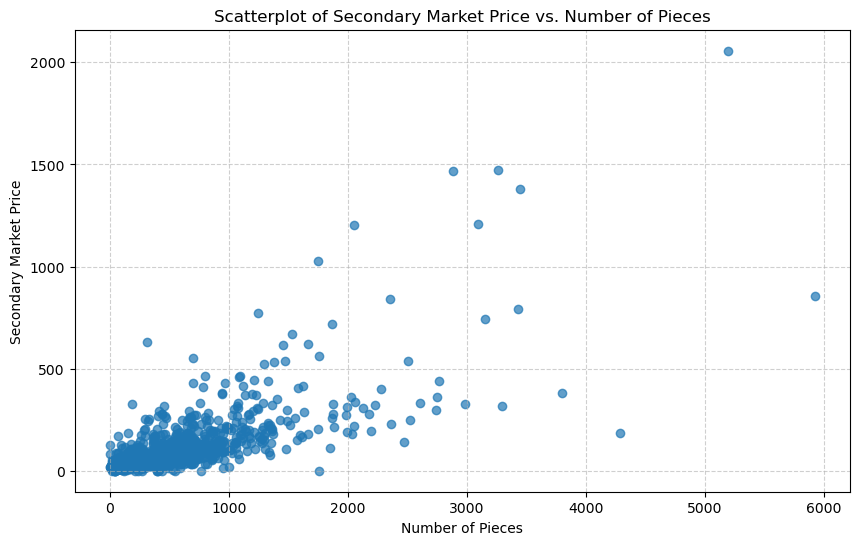

Correlation between Secondary Market Price and Number of Pieces: 0.76


In [119]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

# Calculate the average price for each set
BigBrick['AveragePrice'] = BigBrick[monthly_price_columns].mean(axis=1)

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x='Pieces', y='AveragePrice', data=BigBrick, alpha=0.7)
plt.title('Scatterplot of Secondary Market Price vs. Number of Pieces')
plt.xlabel('Number of Pieces')
plt.ylabel('Secondary Market Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# calculate correlation
correlation = BigBrick['AveragePrice'].corr(BigBrick['Pieces'])
print(f"Correlation between Secondary Market Price and Number of Pieces: {correlation:.2f}")


In [38]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

# Calculate the average price for each set
BigBrick['average_price'] = BigBrick[monthly_price_columns].mean(axis=1)
BigBrick['average_price'] = BigBrick['average_price'].round(2)

# sort average price
top_ten_sets = BigBrick.sort_values(by='average_price', ascending=False).head(10)


# only want to display these columns
top_ten_sets = top_ten_sets[['Theme', 'SetName', 'year of release', 'average_price']]

display(top_ten_sets)

,Theme,SetName,year of release,average_price
0,Star Wars,Ultimate Collector's Millennium Falcon,2007,2057.1075
10,Advanced models,Grand Carousel,2009,1471.886875
31,Advanced models,Statue of Liberty,2000,1469.34625
6,Star Wars,Death Star II,2005,1381.49625
7,Star Wars,Imperial Star Destroyer,2002,1207.633125
63,Advanced models,Cafe Corner,2007,1203.259375
16,Star Wars,Rebel Blockade Runner,2001,1027.578125
5,Advanced models,Taj Mahal,2008,855.64375
50,Advanced models,Green Grocer,2008,839.875625
17,Advanced models,Eiffel Tower,2007,792.10375


In [40]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]


BigBrick['average_price'] = BigBrick[monthly_price_columns].mean(axis=1)

# Group by 'year of release' and calculate the average price per year
yearly_avg_price = BigBrick.groupby('year of release')['average_price'].mean().reset_index()

# sort dataframe
yearly_avg_price_sorted = yearly_avg_price.sort_values(by='average_price', ascending=False)

# Find the year with the highest, median, and lowest average price
year_highest_avg_price = yearly_avg_price_sorted.iloc[0]
year_median_avg_price = yearly_avg_price_sorted.iloc[len(yearly_avg_price_sorted) // 2]
year_lowest_avg_price = yearly_avg_price_sorted.iloc[-1]


print("Year with the highest average price per set:")
print(year_highest_avg_price)

print("\nYear with the median average price per set:")
print(year_median_avg_price)

print("\nYear with the lowest average price per set:")
print(year_lowest_avg_price)

Year with the highest average price per set:
year of release          2007
average_price      138.779093
Name: 23, dtype: object

Year with the median average price per set:
year of release         2010
average_price      79.249978
Name: 26, dtype: object

Year with the lowest average price per set:
year of release         1998
average_price      35.552083
Name: 14, dtype: object


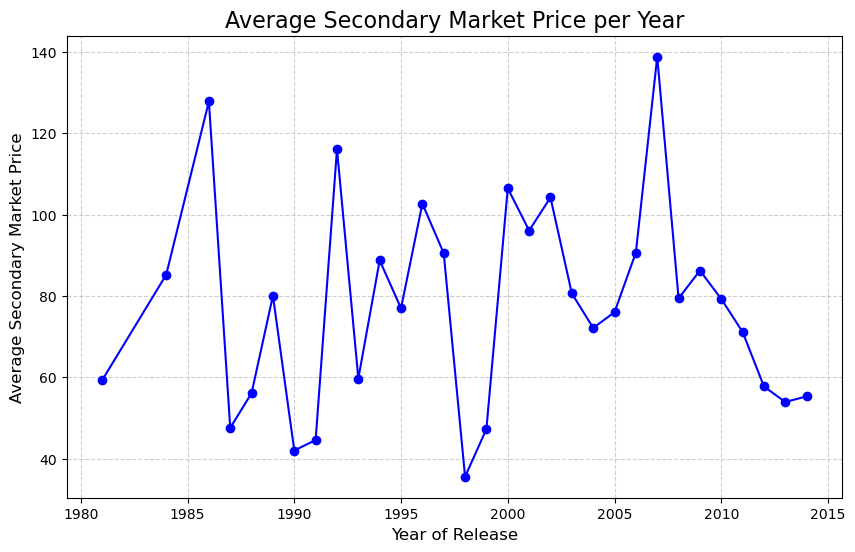

In [123]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

BigBrick['average_price'] = BigBrick[monthly_price_columns].mean(axis=1)

# grouped 'year of release' and calculate the average price per year
yearly_avg_price = BigBrick.groupby('year of release')['average_price'].mean().reset_index()

# plot linechart
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price['year of release'], yearly_avg_price['average_price'], marker='o', linestyle='-', color='b')

plt.title('Average Secondary Market Price per Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Secondary Market Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


plt.show()

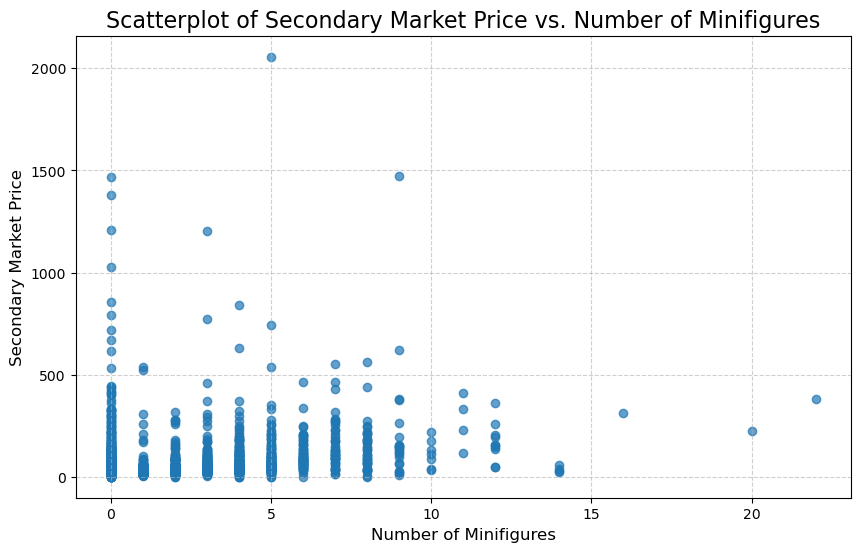

Correlation between Secondary Market Price and Number of Minifigures: 0.19


In [121]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

BigBrick['average_price'] = BigBrick[monthly_price_columns].mean(axis=1)

# make scatterplot of average price vs. number of minifigures
plt.figure(figsize=(10, 6))
plt.scatter(BigBrick['# of minifigures'], BigBrick['average_price'], alpha=0.7)
plt.title('Scatterplot of Secondary Market Price vs. Number of Minifigures', fontsize=16)
plt.xlabel('Number of Minifigures', fontsize=12)
plt.ylabel('Secondary Market Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


plt.show()

# calculate correlation
correlation = BigBrick['average_price'].corr(BigBrick['# of minifigures'])
print(f"Correlation between Secondary Market Price and Number of Minifigures: {correlation:.2f}")

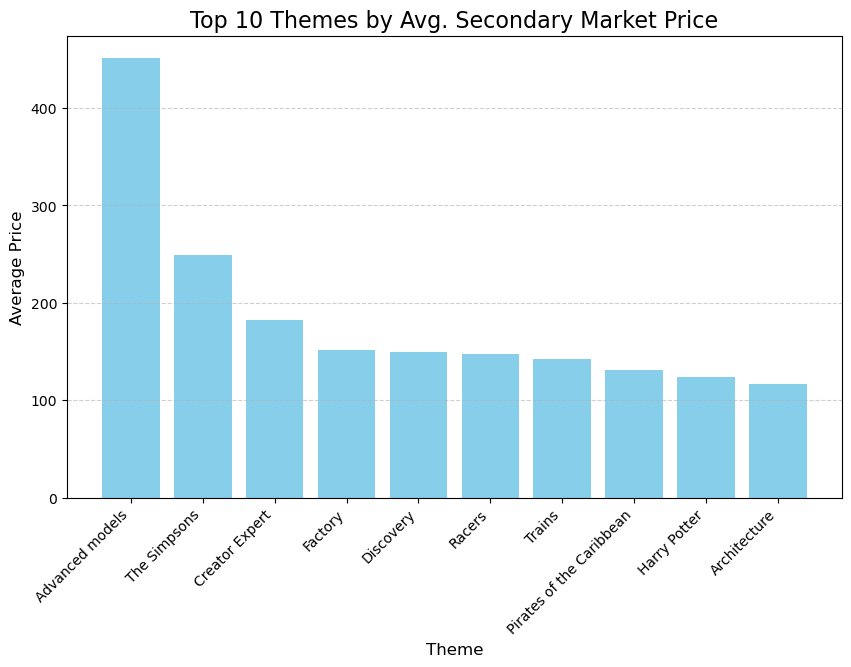

In [97]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]


BigBrick['average_price'] = BigBrick[monthly_price_columns].mean(axis=1)

#group by theme
theme_avg_price = BigBrick.groupby('Theme')['average_price'].mean().reset_index()


theme_avg_price_sorted = theme_avg_price.sort_values(by='average_price', ascending=False)

#show top 10 values
top_5_themes = theme_avg_price_sorted.head(10)

#plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_themes['Theme'], top_5_themes['average_price'], color='skyblue')


plt.title('Top 10 Themes by Avg. Secondary Market Price', fontsize=16)
plt.xlabel('Theme', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

plt.show()

In [147]:

# filter for 2007
year_2007_data = BigBrick[BigBrick['year of release'] == 2007]

monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

year_2007_data['average_price'] = year_2007_data[monthly_price_columns].mean(axis=1)

top_3_sets = year_2007_data.sort_values(by='average_price', ascending=False).head(3)

print("Top 3 Sets by Average Secondary Market Price in 2007:")
print(top_3_sets[['id', 'SetName', 'average_price']])

Top 3 Sets by Average Secondary Market Price in 2007:
       id                                 SetName average_price
0   10179  Ultimate Collector's Millennium Falcon     2057.1075
63  10182                             Cafe Corner   1203.259375
17  10181                           Eiffel Tower      792.10375


/var/folders/_q/tzbvj7gs4y96dc8xjmgrsmf40000gn/T/ipykernel_37706/2297421260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2007_data['average_price'] = year_2007_data[monthly_price_columns].mean(axis=1)


In [137]:

# filter for 2007
year_1998_data = BigBrick[BigBrick['YearFrom'] == 1998]

monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

year_1998_data['average_price'] = year_1998_data[monthly_price_columns].mean(axis=1)

top_3_sets = year_1998_data.sort_values(by='average_price', ascending=False).head(3)

print("Top 3 Sets by Average Secondary Market Price in 1998:")
print(top_3_sets[['id', 'SetName', 'average_price']])

Top 3 Sets by Average Secondary Market Price in 1998:
        id                SetName average_price
190   6093  Flying Ninja Fortress    127.759375
1013  6083     Samurai Stronghold     44.616875
1375  6045         Ninja Surprise       30.3075


/var/folders/_q/tzbvj7gs4y96dc8xjmgrsmf40000gn/T/ipykernel_37706/644769525.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1998_data['average_price'] = year_1998_data[monthly_price_columns].mean(axis=1)


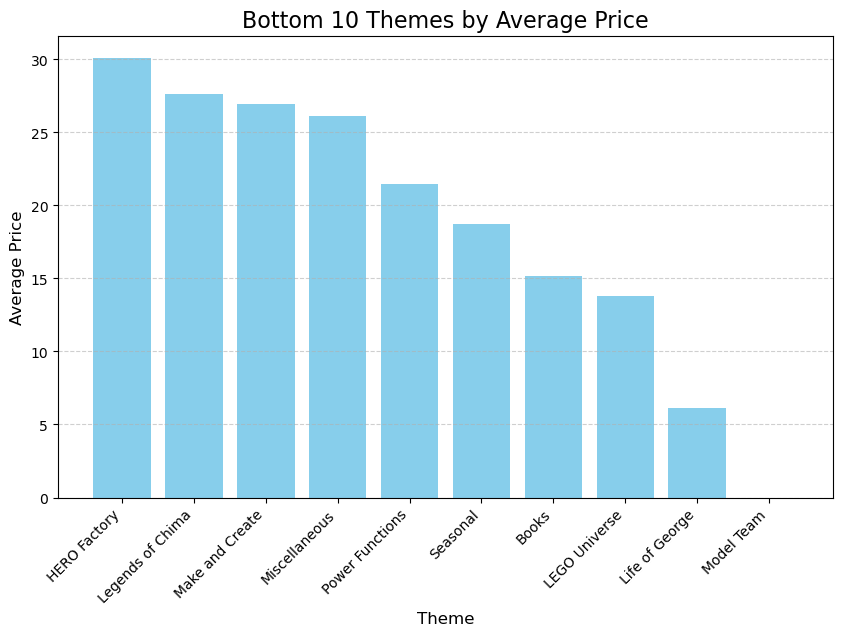

In [70]:
monthly_price_columns = [col for col in BigBrick.columns if col.startswith('20')]

BigBrick['average_price'] = BigBrick[monthly_price_columns].mean(axis=1)

# group by theme
theme_avg_price = BigBrick.groupby('Theme')['average_price'].mean().reset_index()

#sort in decesnding order
theme_avg_price_sorted = theme_avg_price.sort_values(by='average_price', ascending=False)

#get bottom 10 themes
top_5_themes = theme_avg_price_sorted.tail(10)

#  Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_themes['Theme'], top_5_themes['average_price'], color='skyblue')

plt.title('Bottom 10 Themes by Average Price', fontsize=16)
plt.xlabel('Theme', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=45, ha='right')

plt.show()

# Retail Price

Correlation between Retail Price and Number of Pieces: 0.93


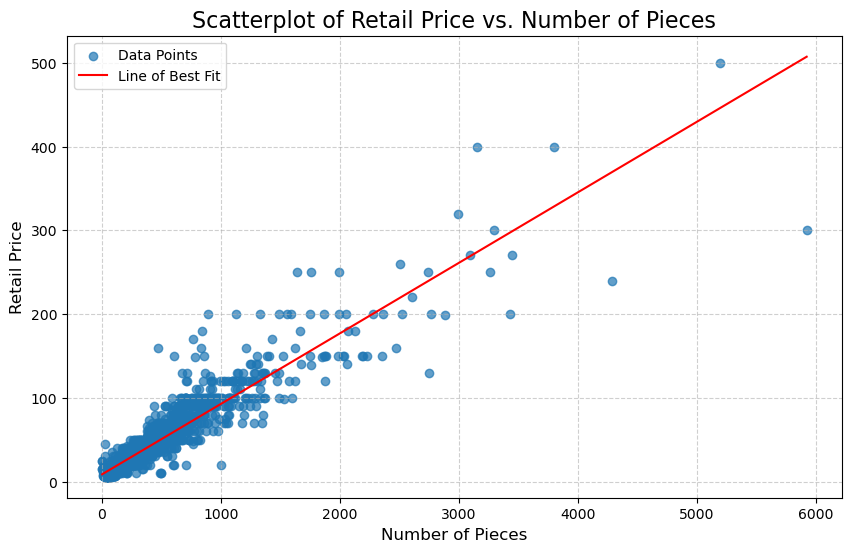

In [74]:
#calculate corrrelation
correlation = BigBrick['USRetailPrice'].corr(BigBrick['Pieces'])
print(f"Correlation between Retail Price and Number of Pieces: {correlation:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(BigBrick['Pieces'], BigBrick['USRetailPrice'], alpha=0.7, label='Data Points')

# Line of best fit
coefficients = np.polyfit(BigBrick['Pieces'], BigBrick['USRetailPrice'], 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(BigBrick['Pieces'].min(), BigBrick['Pieces'].max(), 100)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, color='red', label='Line of Best Fit')

plt.title('Scatterplot of Retail Price vs. Number of Pieces', fontsize=16)
plt.xlabel('Number of Pieces', fontsize=12)
plt.ylabel('Retail Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

Correlation between Retail Price and Number of Minifigures: 0.39


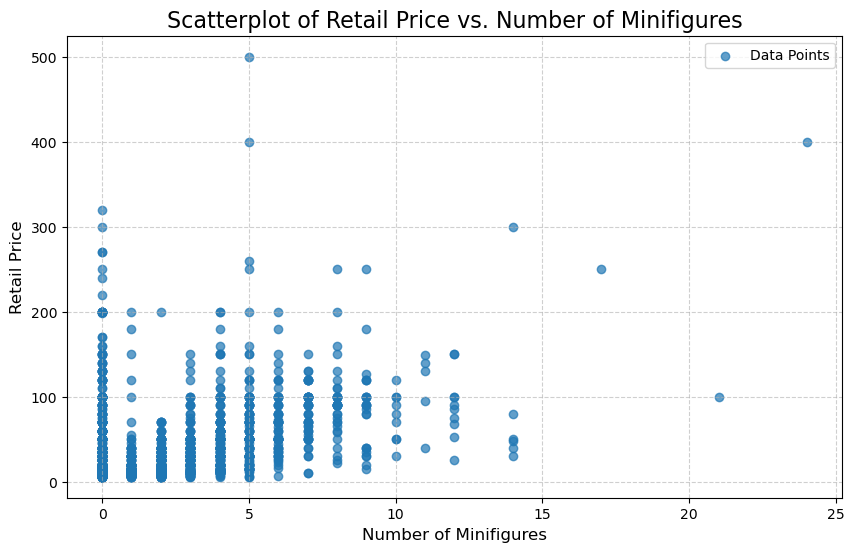

In [139]:
BigBrick['Minifigs'] = BigBrick['Minifigs'].fillna(0)
correlation = BigBrick['USRetailPrice'].corr(BigBrick['Minifigs'])
print(f"Correlation between Retail Price and Number of Minifigures: {correlation:.2f}")


plt.figure(figsize=(10, 6))
#plot scatterplot
plt.scatter(BigBrick['Minifigs'], BigBrick['USRetailPrice'], alpha=0.7, label='Data Points')

plt.title('Scatterplot of Retail Price vs. Number of Minifigures', fontsize=16)
plt.xlabel('Number of Minifigures', fontsize=12)
plt.ylabel('Retail Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

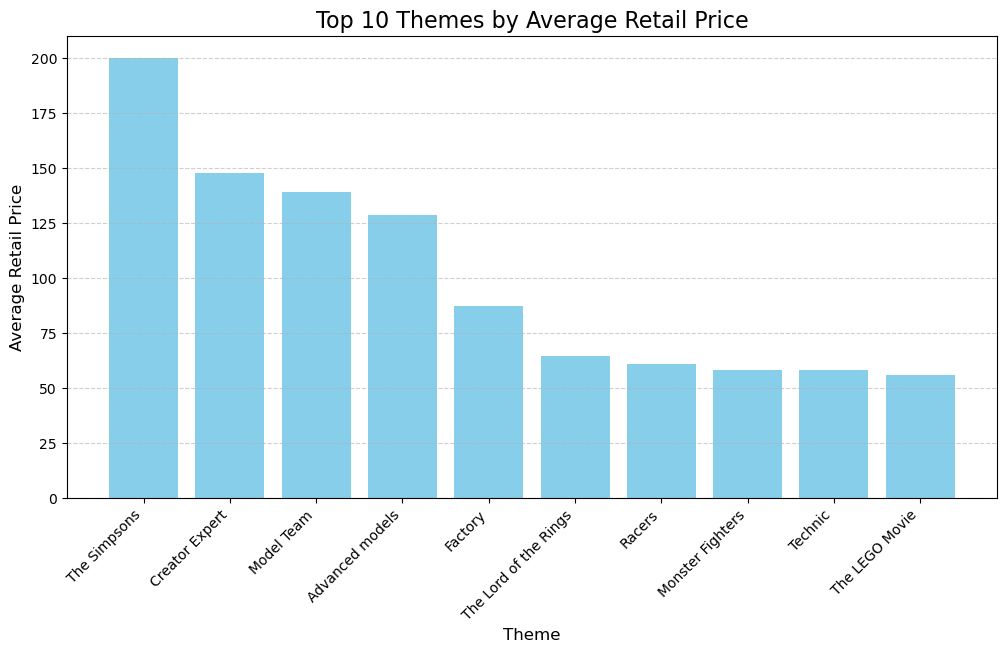

In [86]:
theme_avg_price = BigBrick.groupby('Theme')['USRetailPrice'].mean().reset_index()


theme_avg_price_sorted = theme_avg_price.sort_values(by='USRetailPrice', ascending=False)

#top 10
top_10_themes = theme_avg_price_sorted.head(10)

#Plot  bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_themes['Theme'], top_10_themes['USRetailPrice'], color='skyblue')

plt.title('Top 10 Themes by Average Retail Price', fontsize=16)
plt.xlabel('Theme', fontsize=12)
plt.ylabel('Average Retail Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

plt.show()

In [105]:
#exclude Model Team because all prices were 0
BigBrick_filtered = BigBrick[BigBrick['Theme'] != 'Model Team']

monthly_price_columns = [col for col in BigBrick_filtered.columns if col.startswith('20')]

BigBrick_filtered['AverageSecondaryPrice'] = BigBrick_filtered[monthly_price_columns].mean(axis=1)

#find avg price by theme
theme_avg_prices = BigBrick_filtered.groupby('Theme').agg({
    'USRetailPrice': 'mean',
    'AverageSecondaryPrice': 'mean'
}).reset_index()

theme_avg_prices_retail_sorted = theme_avg_prices.sort_values(by='USRetailPrice', ascending=True)
theme_avg_prices_secondary_sorted = theme_avg_prices.sort_values(by='AverageSecondaryPrice', ascending=True)


bottom_retail_themes = theme_avg_prices_retail_sorted.head(10)
bottom_secondary_themes = theme_avg_prices_secondary_sorted.head(10)


print("Bottom Themes for Retail Price (Lowest Average Prices):")
print(bottom_retail_themes[['Theme', 'USRetailPrice']])

print("\nBottom Themes for Secondary Market Price (Lowest Average Prices):")
print(bottom_secondary_themes[['Theme', 'AverageSecondaryPrice']])

Bottom Themes for Retail Price (Lowest Average Prices):
              Theme  USRetailPrice
38         Seasonal       9.035455
22    LEGO Universe       9.990000
25  Make and Create      10.000000
33  Power Functions      10.990000
28    Miscellaneous      14.212222
18     HERO Factory      14.636341
5          Bionicle      18.731237
6             Books      20.000000
17          Friends      26.684915
7              Cars      28.262727

Bottom Themes for Secondary Market Price (Lowest Average Prices):
               Theme AverageSecondaryPrice
24    Life of George                  6.12
22     LEGO Universe             13.788125
6              Books                 15.18
38          Seasonal             18.702301
33   Power Functions               21.4375
28     Miscellaneous             26.103611
25   Make and Create             26.916875
23  Legends of Chima             27.622188
18      HERO Factory             30.126567
35  Prince of Persia               34.0705


/var/folders/_q/tzbvj7gs4y96dc8xjmgrsmf40000gn/T/ipykernel_37706/4166420822.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigBrick_filtered['AverageSecondaryPrice'] = BigBrick_filtered[monthly_price_columns].mean(axis=1)


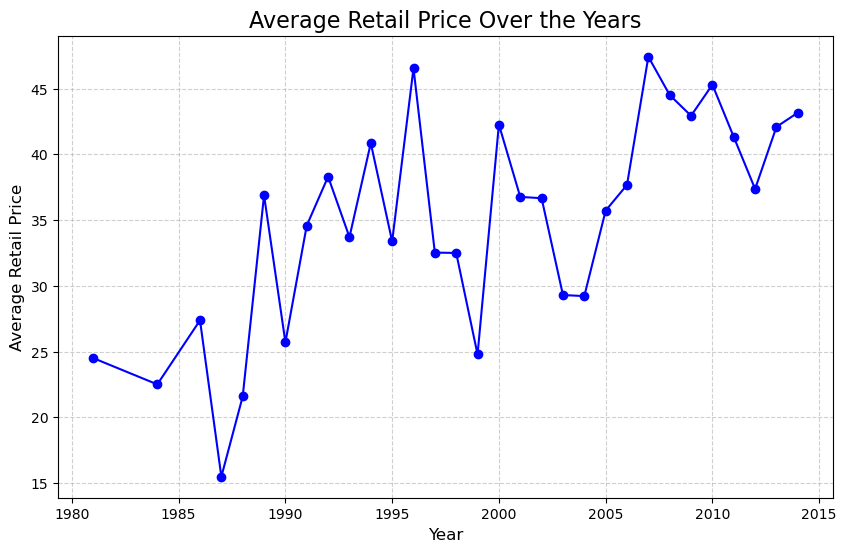

In [141]:
#excluded 2015 to stay consistent with years displayed in secondary market chart
yearly_avg_price = BigBrick[BigBrick['year of release'] != 2015].groupby('year of release')['USRetailPrice'].mean().reset_index()

#plot line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price['year of release'], yearly_avg_price['USRetailPrice'], marker='o', linestyle='-', color='b')
plt.title('Average Retail Price Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Retail Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()